In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load in the data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/processed.cleveland.data", header=None)
df_hungary = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/processed.hungarian.data", header=None)
df_switzerland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/processed.switzerland.data", header=None)
df_va = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/processed.va.data", header=None)

In [3]:
df_cleveland.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
def change_column_names(df):
    """
    Changes the column names to the ones specified on the UCI website
    param df: A dataframe with columns
    return: A dataframe with transformed column names
    """
    df.columns = ["age", "sex", "cp", "trest", "chol", "fbs", "restecg",
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
    return df

In [5]:
# Using the function to change the column names

df_cleveland = change_column_names(df_cleveland)

In [6]:
df_cleveland

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [7]:
# Changing the names of the columns for the other dataframes
df_hungary = change_column_names(df_hungary)
df_switzerland = change_column_names(df_switzerland)
df_va = change_column_names(df_va)

In [8]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   trest    303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  num      303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [9]:
df_hungary.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [10]:
df_hungary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      294 non-null    int64  
 1   sex      294 non-null    int64  
 2   cp       294 non-null    int64  
 3   trest    294 non-null    object 
 4   chol     294 non-null    object 
 5   fbs      294 non-null    object 
 6   restecg  294 non-null    object 
 7   thalach  294 non-null    object 
 8   exang    294 non-null    object 
 9   oldpeak  294 non-null    float64
 10  slope    294 non-null    object 
 11  ca       294 non-null    object 
 12  thal     294 non-null    object 
 13  num      294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [11]:
df_switzerland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [12]:
df_switzerland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      123 non-null    int64 
 1   sex      123 non-null    int64 
 2   cp       123 non-null    int64 
 3   trest    123 non-null    object
 4   chol     123 non-null    int64 
 5   fbs      123 non-null    object
 6   restecg  123 non-null    object
 7   thalach  123 non-null    object
 8   exang    123 non-null    object
 9   oldpeak  123 non-null    object
 10  slope    123 non-null    object
 11  ca       123 non-null    object
 12  thal     123 non-null    object
 13  num      123 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 13.6+ KB


In [13]:
df_va.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [14]:
df_va.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   age      200 non-null    int64 
 1   sex      200 non-null    int64 
 2   cp       200 non-null    int64 
 3   trest    200 non-null    object
 4   chol     200 non-null    object
 5   fbs      200 non-null    object
 6   restecg  200 non-null    int64 
 7   thalach  200 non-null    object
 8   exang    200 non-null    object
 9   oldpeak  200 non-null    object
 10  slope    200 non-null    object
 11  ca       200 non-null    object
 12  thal     200 non-null    object
 13  num      200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [15]:
# Replacing the question marks with nan 
df_cleveland.replace("?", np.nan, inplace=True)
df_hungary.replace("?", np.nan, inplace=True)
df_switzerland.replace("?", np.nan, inplace=True)
df_va.replace("?", np.nan, inplace=True)

In [16]:
# Checking the percentage of null values for each dataframe
df_cleveland.isnull().mean()

age        0.000000
sex        0.000000
cp         0.000000
trest      0.000000
chol       0.000000
fbs        0.000000
restecg    0.000000
thalach    0.000000
exang      0.000000
oldpeak    0.000000
slope      0.000000
ca         0.013201
thal       0.006601
num        0.000000
dtype: float64

In [17]:
df_hungary.isnull().mean()

age        0.000000
sex        0.000000
cp         0.000000
trest      0.003401
chol       0.078231
fbs        0.027211
restecg    0.003401
thalach    0.003401
exang      0.003401
oldpeak    0.000000
slope      0.646259
ca         0.989796
thal       0.904762
num        0.000000
dtype: float64

In [18]:
df_switzerland.isnull().mean()

age        0.000000
sex        0.000000
cp         0.000000
trest      0.016260
chol       0.000000
fbs        0.609756
restecg    0.008130
thalach    0.008130
exang      0.008130
oldpeak    0.048780
slope      0.138211
ca         0.959350
thal       0.422764
num        0.000000
dtype: float64

In [19]:
df_va.isnull().mean()

age        0.000
sex        0.000
cp         0.000
trest      0.280
chol       0.035
fbs        0.035
restecg    0.000
thalach    0.265
exang      0.265
oldpeak    0.280
slope      0.510
ca         0.990
thal       0.830
num        0.000
dtype: float64

In [20]:
# Testing to see if the replacement worked
df_va.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [21]:
# Merging the cleveland data with the hungary data
df_combined = df_cleveland.append(df_hungary, ignore_index=True)
df_combined = df_combined.append(df_switzerland, ignore_index=True)
df_combined = df_combined.append(df_va, ignore_index=True)

In [22]:
df_combined

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127,333,1,1,154,0,0,NaN,NaN,NaN,1
916,62.0,1.0,1.0,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55.0,1.0,4.0,122,223,1,1,100,0,0,NaN,NaN,6,2
918,58.0,1.0,4.0,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
total_length = len(df_cleveland) + len(df_hungary) + len(df_switzerland) + len(df_va)

In [24]:
# Making sure the combined dataframe has the correct number of rows
assert total_length == 920

In [25]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      920 non-null    float64
 1   sex      920 non-null    float64
 2   cp       920 non-null    float64
 3   trest    861 non-null    object 
 4   chol     890 non-null    object 
 5   fbs      830 non-null    object 
 6   restecg  918 non-null    object 
 7   thalach  865 non-null    object 
 8   exang    865 non-null    object 
 9   oldpeak  858 non-null    object 
 10  slope    611 non-null    object 
 11  ca       309 non-null    object 
 12  thal     434 non-null    object 
 13  num      920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 100.8+ KB


In [26]:
# Checking the percentage of null values for the combined dataframe
df_combined.isnull().mean()

age        0.000000
sex        0.000000
cp         0.000000
trest      0.064130
chol       0.032609
fbs        0.097826
restecg    0.002174
thalach    0.059783
exang      0.059783
oldpeak    0.067391
slope      0.335870
ca         0.664130
thal       0.528261
num        0.000000
dtype: float64

In [27]:
df_cleveland["num"]

0      0
1      2
2      1
3      0
4      0
      ..
298    1
299    2
300    3
301    1
302    0
Name: num, Length: 303, dtype: int64

In [28]:
def plot_histogram(feature, df):
    """
    Plots the distribution of a given column or Series
    param feature: A column of a dataframe
    param df: A dataframe that contains the feature
    return: A histogram of the feature
    """
    # Plotting the histogram for the feature
    plt.hist(df[feature])
    # Setting a title
    plt.title(feature.capitalize() + " Distribution")
    # Setting the x-axis label
    plt.xlabel(feature.capitalize)
    # Setting the y-axis label
    plt.ylabel("Frequency")
    # Displaying the plots
    plt.show()

In [29]:
# Dropping the null values in the dataframe
df_cleveland.dropna(inplace=True)

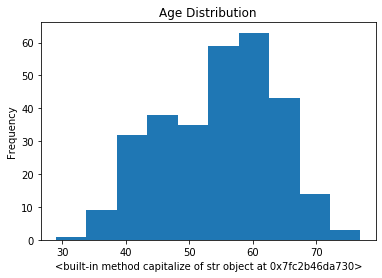

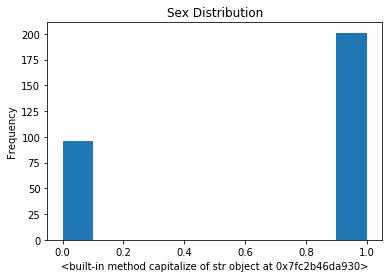

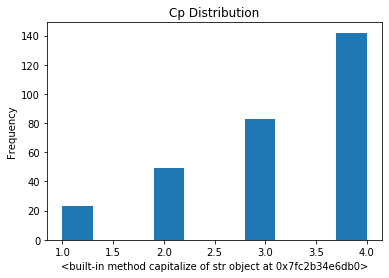

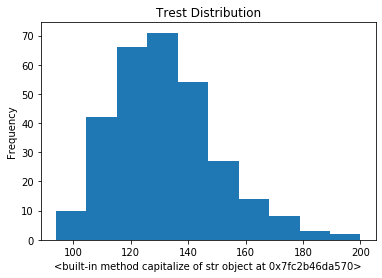

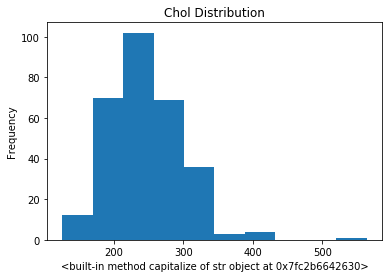

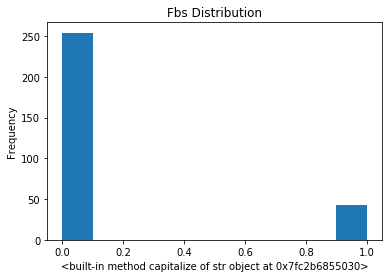

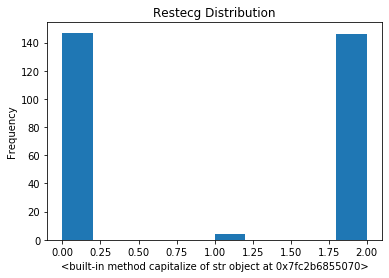

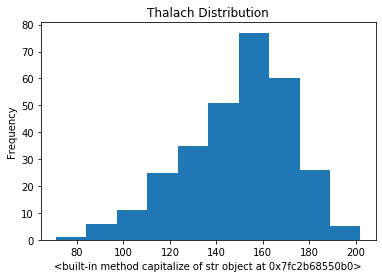

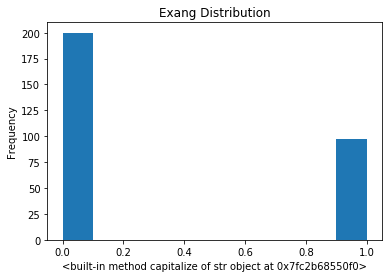

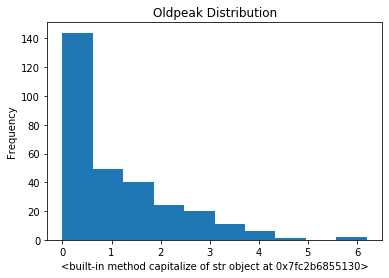

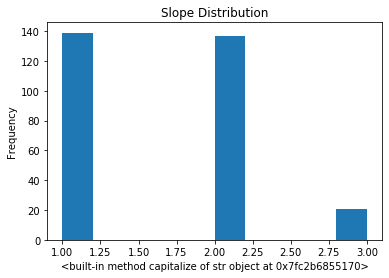

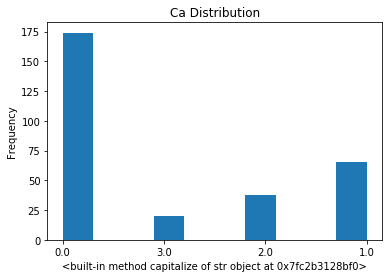

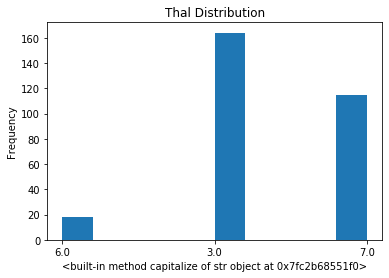

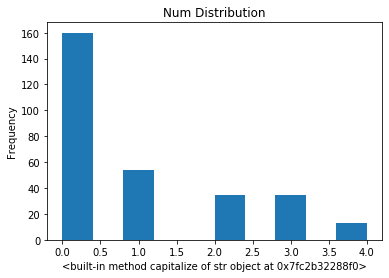

In [30]:
vars_cleveland = df_cleveland.columns

for column in vars_cleveland:
    plot_histogram(column, df_cleveland)

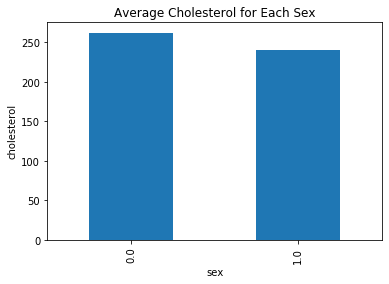

In [31]:
# Creating a graph that compares the mean cholesterol for men and women
df_cleveland.groupby(df_cleveland["sex"])['chol'].mean().plot.bar()
plt.title("Average Cholesterol for Each Sex")
plt.ylabel('cholesterol')
plt.show()

In [32]:
# Calculating the mean cholesterol for the whole sample
df_cleveland["chol"].mean()

247.35016835016836

In [33]:
# Removing the outlier from the cholesterol feature
df_cleveland = df_cleveland[df_cleveland.chol < 500]

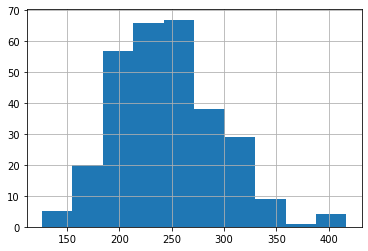

In [34]:
# Making sure the outlier was removed
df_cleveland["chol"].hist()

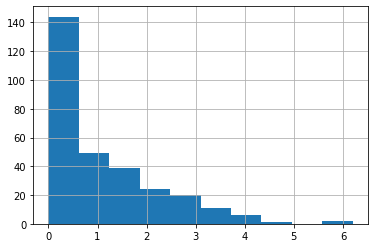

In [35]:
df_cleveland["oldpeak"].hist()

In [36]:
# Getting the total number of positive responses
num_positive = len(df_cleveland[df_cleveland.num > 0])
print(num_positive)

137


In [37]:
# Download the data before transforming the response
df_cleveland.to_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data_orig.csv")

In [38]:
# Transforming the num column to a binary column
df_cleveland["num"] = np.where(df_cleveland.num < 1, 0, 1)

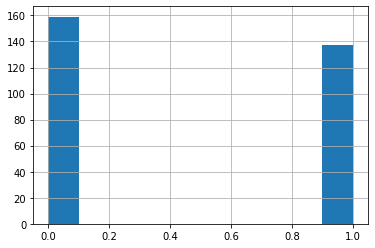

In [39]:
df_cleveland["num"].hist()

In [40]:
# Making sure the number of positive responses are equal to 139
print(len(df_cleveland[df_cleveland.num == 1]))

137


In [42]:
# Creating a correlation matrix for the features

# Importing the graphing library
from heatmap import corrplot

# Creating the correlation matrix
corrplot(df_cleveland.corr(), size_scale=200)

ModuleNotFoundError: No module named 'heatmap'

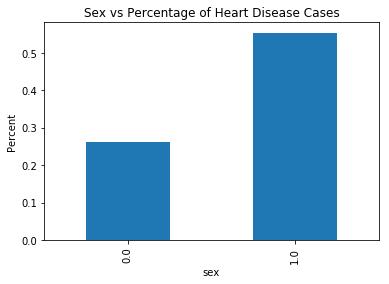

In [39]:
# Creating a graph that compares the sex to the percentage of heart disease cases
df_cleveland.groupby(df_cleveland["sex"])['num'].mean().plot.bar()
plt.title("Sex vs Percentage of Heart Disease Cases")
plt.ylabel('Percent')
plt.show()

In [45]:
# Getting all columns except for num and oldpeak
column_names = list(df_cleveland.columns)
print(column_names)
column_names.remove("num")
column_names.remove("oldpeak")

['age', 'sex', 'cp', 'trest', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [50]:
# Changing the types of every column except num
for column in column_names:
    df_cleveland[column] = df_cleveland[column].astype("float64")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
df_cleveland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
age        302 non-null float64
sex        302 non-null float64
cp         302 non-null float64
trest      302 non-null float64
chol       302 non-null float64
fbs        302 non-null float64
restecg    302 non-null float64
thalach    302 non-null float64
exang      302 non-null float64
oldpeak    302 non-null float64
slope      302 non-null float64
ca         298 non-null float64
thal       300 non-null float64
num        302 non-null int64
dtypes: float64(13), int64(1)
memory usage: 35.4 KB


In [57]:
# Grouping women based on whether they are 45 or older or younger than 45 (Menopausal testing)
women_45_or_older = df_cleveland[(df_cleveland['age'] >= 45) & (df_cleveland['sex']==0)]
women_younger_45 = df_cleveland[(df_cleveland['age'] < 45) & (df_cleveland['sex']==0)]

# Getting the percentage of positive cases for each group
women_45_mean = women_45_or_older["num"].mean()
women_younger_45_mean = women_younger_45["num"].mean()

Text(0, 0.5, 'Percentage of Positive Cases')

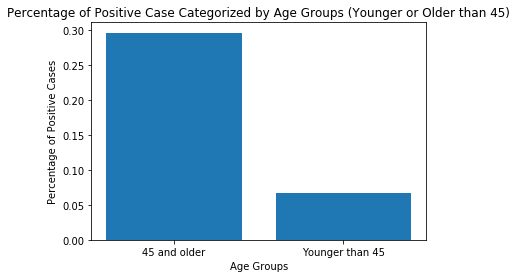

In [58]:
# Creating a graph that shows the percentage of positive cases for women 45 and older vs women younger than 45

# Creating the x and y axis
x_axis = ["45 and older", "Younger than 45"]
y_axis = [women_45_mean, women_younger_45_mean]

# Creating the graph
plt.bar(x_axis, y_axis)
plt.title("Percentage of Positive Case Categorized by Age Groups (Younger or Older than 45)")
plt.xlabel("Age Groups")
plt.ylabel("Percentage of Positive Cases")

Text(0, 0.5, 'Percentage of Positive Cases')

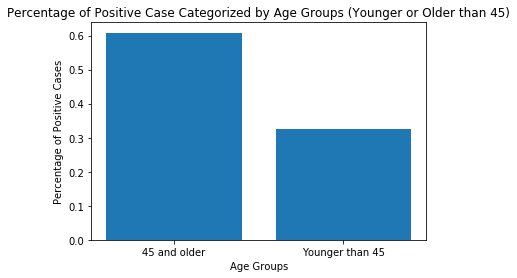

In [60]:
# Creating the graph but for males

# Grouping men based on whether they are 45 or older or younger than 45
men_45_or_older = df_cleveland[(df_cleveland['age'] >= 45) & (df_cleveland['sex']==1)]
men_younger_45 = df_cleveland[(df_cleveland['age'] < 45) & (df_cleveland['sex']==1)]

# Getting the percentage of positive cases for each group
men_45_mean = men_45_or_older["num"].mean()
men_younger_45_mean = men_younger_45["num"].mean()

# Creating the x and y axis
x_axis = ["45 and older", "Younger than 45"]
y_axis = [men_45_mean, men_younger_45_mean]

# Creating the graph
plt.bar(x_axis, y_axis)
plt.title("Percentage of Positive Case Categorized by Age Groups (Younger or Older than 45)")
plt.xlabel("Age Groups")
plt.ylabel("Percentage of Positive Cases")

In [72]:
df_cleveland.shape

(296, 14)

In [73]:
# Save the cleveland data to a csv so that it can be used in the model notebook
df_cleveland.to_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv")